# 데이터 입출력

In [1]:
import pandas as pd
from pandas import Series, DataFrame

## 1. csv 파일 읽기 - read_csv()

In [2]:
# data/ex1.csv 읽기 (컬럼명이 존재하는 csv 파일)
pd.read_csv('data/ex1.csv')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
# data/ex2.csv 읽기 (컬럼명이 없는 csv 파일)
#pd.read_csv('data/ex2.csv', header = None) #  csv 파일의 첫번째 줄이 컬럼명이 아님을 명시함.
pd.read_csv('data/ex2.csv', names = ['a','b','c','d','message']) # 컬럼명을 names 인자로 설정

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
# data/ex3.csv 읽기
pd.read_csv('data/ex3.csv', sep = '\s+')
#sep 인자에 구분자 명시. 정규표현식 사용 가능. '\s+'는 적어도 공백이 하나라는 의미

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [10]:
# data/ex4.csv 읽기 (주석이 포함되어 있는 파일 읽기)
# 1. skiprows를 이용하여, 특정 행을 읽지 않도록 함.
pd.read_csv('data/ex4.csv', skiprows = [0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
#2. comment 인자를 이용하여, 주석은 데이터로 읽지 않음.
pd.read_csv('data/ex4.csv', comment = '#')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# 용량이 매우 큰 파일 읽기. (로딩 시간도 문제지만, 메모리 부족 시, OOM(Out Of Memory가 발생함.)
#pd.read_csv('data/us_presidental.csv')

In [12]:
#1) 10줄만 읽어오기
pd.read_csv('data/us_presidental.csv', nrows = 10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,INFORMATION REQUESTED,INFORMATION REQUESTED,250,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725,ST. JOSEPH HOSPITAL,RN,250,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865,RAYTHEON,ELECTRICAL ENGINEER,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [13]:
# 2) 실제 파일을 읽는 게 아니라, Reader 객체만 생성하여, 일정 갯수만큼씩 읽어오기
리더 = pd.read_csv('data/us_presidental.csv', chunksize = 1000)

In [14]:
리더

In [15]:
#chunksize만큼 데이터를 읽어옴.
next(리더)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190.0,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,852106725.0,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,857498865.0,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [16]:
데이터목록 = []
for 프레임 in 리더:
    데이터목록.append(프레임)

In [17]:
len(데이터목록)

1001

In [18]:
데이터목록[0]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
1000,C00431171,P80003353,"Romney, Mitt","NEUWIEN, SUSAN W. MS.",ENTERPRISE,AL,363302385,RETIRED,RETIRED,1000.0,13-FEB-12,NaN,NaN,NaN,SA17A,780124
1001,C00431171,P80003353,"Romney, Mitt","NEUWIEN, SUSAN W. MS.",ENTERPRISE,AL,363302385,RETIRED,RETIRED,100.0,18-FEB-12,NaN,NaN,NaN,SA17A,780124
1002,C00431171,P80003353,"Romney, Mitt","NELSON, ARTHUR R. MR.",DECATUR,AL,356034622,TFA,PRESIDENT,200.0,29-FEB-12,NaN,NaN,NaN,SA17A,780124
1003,C00431171,P80003353,"Romney, Mitt","HOLLIS, HAYNE MR.",DOTHAN,AL,363033008,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,1000.0,29-FEB-12,NaN,NaN,NaN,SA17A,780124
1004,C00431171,P80003353,"Romney, Mitt","GORRIE, ALISON MRS.",BIRMINGHAM,AL,352231228,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,1000.0,22-FEB-12,NaN,NaN,NaN,SA17A,780124
1005,C00431171,P80003353,"Romney, Mitt","GORRIE, JIM MR.",BIRMINGHAM,AL,352231228,B. & G.,CONTRACTOR,1000.0,22-FEB-12,NaN,NaN,NaN,SA17A,780124
1006,C00431171,P80003353,"Romney, Mitt","EVANS, NANCY D. MRS.",DOTHAN,AL,363059355,WALLACE COLLEGE,CLINICAL NURSING INSTRUCTOR,100.0,08-FEB-12,NaN,NaN,NaN,SA17A,780124
1007,C00431171,P80003353,"Romney, Mitt","COX, ANNETTE MS.",DELL CITY,AL,351286719,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,28-FEB-12,NaN,NaN,NaN,SA17A,780124
1008,C00431171,P80003353,"Romney, Mitt","COX, ANNETTE P. MS.",SPRINGVILLE,AL,35146,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,28-FEB-12,NaN,NaN,NaN,SA17A,780124
1009,C00431171,P80003353,"Romney, Mitt","BALLARD, HALYCON",BIRMINGHAM,AL,352103049,SELF-EMPLOYED,H R EXECUTIVE,50.0,11-FEB-12,NaN,NaN,NaN,SA17A,780124


## 2. 클립보드를 이용하여 데이터 읽기

In [19]:
#IE에서는 안되고, 크롬에서 저장하고자 하는 테이블 형태의 데이터를 복사한 후에 아래 명령어 출력하면, 데이터프레임으로 생성됨.
관심업종 = pd.read_clipboard()

In [20]:
관심업종

,N,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
0,1,삼성전자,"49,500",상승 100,+0.20%,100,"3,177,566","6,419,325",52.70,"4,812,281",9.13,21.01,토론실
1,2,SK하이닉스,"87,200",상승 500,+0.58%,"5,000","634,818","728,002",50.36,"1,510,404",5.97,36.80,토론실
2,3,삼성전자우,"39,250",상승 500,+1.29%,100,"354,674","903,629",92.79,"508,542",7.24,NaN,토론실
3,4,셀트리온,"270,500","상승 3,000",+1.12%,"1,000","339,196","125,396",21.77,"605,541",84.66,17.84,토론실
4,5,현대차,"149,500",0,0.00%,"5,000","329,313","220,276",46.06,"267,668",10.58,5.92,토론실
5,6,POSCO,"361,500","상승 1,500",+0.42%,"5,000","315,180","87,187",57.69,"100,351",11.30,6.48,토론실
6,7,삼성바이오로직스,"407,000","상승 9,000",+2.26%,"2,500","269,292","66,165",9.77,"578,843",-277.63,-2.41,토론실
7,8,삼성물산,"129,500",상승 500,+0.39%,100,"245,649","189,690",11.01,"270,474",38.73,3.13,토론실
8,9,LG화학,"347,000","상승 1,500",+0.43%,"5,000","244,955","70,592",39.80,"116,545",13.96,12.92,토론실
9,10,KB금융,"56,400","하락 1,200",-2.08%,"5,000","235,815","418,112",69.77,"619,511",7.12,10.18,토론실


## 3. 데이터베이스에서 읽기
### 파이썬에서 sqlite를 내장하고 있음

In [21]:
import sqlite3

In [22]:
#테이블 생성 SQL 정의
테이블생성 = """CREATE TABLE locations
                (a varchar[20], b varchar[20], c integer)"""

In [23]:
#sqlite 접속
conn = sqlite3.connect('test.db')

In [24]:
#테이블 생성 SQL 수행 
conn.execute(테이블생성)

In [25]:
# commit() 수행. - SQL 수행 후, commit을 해야만, 데이터베이스에 SQL 구문이 적용됨 
conn.commit()

In [26]:
#생성된 테이블에 저장할 데이터 정의
data = [['서울','강남', 15]
       ,['서울','강동', 10]
       ,['서울','동대문', 7]
       ,['서울','양천', 12]
       ]

In [30]:
# 데이터 적재 SQL 정의 
적재 = 'insert into locations values (?,?,?)'

In [31]:
#데이터 적재 SQL 수행
conn.executemany(적재, data)

In [32]:
# commit() 수행
conn.commit()

In [33]:
#Select SQL 실행1
pd.read_sql('SELECT * FROM locations', conn)

,a,b,c
0,서울,강남,15
1,서울,강동,10
2,서울,동대문,7
3,서울,양천,12


In [35]:
#Select SQL 실행2
pd.read_sql('SELECT sum(c) FROM locations \
            GROUP BY a', conn)

,sum(c)
0,44


In [36]:
# 데이터베이스의 테이블 크기가 큰 경우에는 cursor 사용하기
cursor = conn.execute('SELECT * FROM locations')

In [37]:
rows = cursor.fetchmany(2)
rows

[('서울', '강남', 15), ('서울', '강동', 10)]

In [38]:
DataFrame(rows)

,0,1,2
0,서울,강남,15
1,서울,강동,10


## 4. 엑셀 파일 읽기
### 유동인구 정보를 담고 있는 엑셀 파일을 읽은 후, 분석 및 시각화 실습도 수행함.

In [3]:
# 유동인구 데이터 읽기 
data = pd.read_excel('data/project data/기본 데이터/0_유동인구_유동인구기본_2015.xlsx', 
                     sheetname = None, skiprows = [0,1,3])

In [9]:
유동인구, 조사지점 = data.values()

In [10]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [11]:
조사지점.head()

,조사지점코드,조사지점명
0,01-001,평창치안센터(파출소).
1,01-002,구기 빌딩앞(카리스).
2,01-003,신흥모피명품전문크리닝.
3,01-004,우리농산물마트.
4,01-005,세검정정류장


In [12]:
#유동인구와 조사지점을 합쳐서 하나의 데이터프레임으로 만들기
유동인구 = pd.merge(유동인구, 조사지점)

In [13]:
유동인구

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.
5,3072,01-003,본조사,금,12시-13시,48.0,2015,신흥모피명품전문크리닝.
6,3073,01-003,본조사,금,13시-14시,30.0,2015,신흥모피명품전문크리닝.
7,3074,01-003,본조사,금,14시-15시,21.0,2015,신흥모피명품전문크리닝.
8,3075,01-003,본조사,금,15시-16시,30.0,2015,신흥모피명품전문크리닝.
9,3076,01-003,본조사,금,16시-17시,39.0,2015,신흥모피명품전문크리닝.


In [62]:
# 실습 1. 유동인구가 가장 많은 조사지점 상위 5개 지점을 추출
지점별유동인구통계 = 유동인구.groupby('조사지점코드')['유동인구수'].agg('sum').sort_values(ascending = False)

In [63]:
상위5개지점 = 지점별유동인구통계[:5]
상위5개지점

조사지점코드
02-251    839691.0
22-055    833091.0
02-848    518664.0
01-422    481449.0
20-030    469098.0
Name: 유동인구수, dtype: float64

In [68]:
# 실습 2. 상위 5개 지점에 대해서 시간대별 유동인구 추이를 시각화
상위5개지점.index

Index(['02-251', '22-055', '02-848', '01-422', '20-030'], dtype='object', name='조사지점코드')

In [71]:
상위5개지점유동인구 = 유동인구[유동인구['조사지점코드'].isin(상위5개지점.index)]

In [74]:
상위5개지점유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명
5810,8247,01-422,본조사,금,07시-08시,252.0,2015,도한사
5811,8248,01-422,본조사,금,08시-09시,741.0,2015,도한사
5812,8249,01-422,본조사,금,09시-10시,1377.0,2015,도한사
5813,8250,01-422,본조사,금,10시-11시,2364.0,2015,도한사
5814,8251,01-422,본조사,금,11시-12시,3606.0,2015,도한사


In [76]:
상위5개지점유동인구통계 = 
상위5개지점유동인구.groupby(['조사지점명', '시간대'])['유동인구수'].agg('sum')

In [79]:
상위5개지점유동인구통계 = 상위5개지점유동인구통계.unstack(0)

In [80]:
%matplotlib inline
import matplotlib

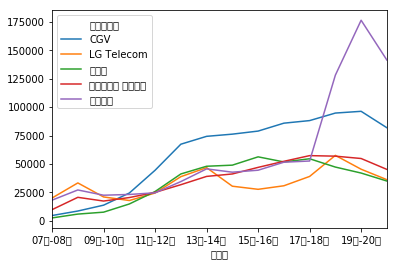

In [81]:
상위5개지점유동인구통계.plot()

In [82]:
# 한글깨짐 해결 - 맑은 고딕 폰트 추가

In [83]:
matplotlib.rcParams['font.family']

['sans-serif']

In [84]:
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
# 맑은 고딕 폰트 추가

In [85]:
matplotlib.rcParams['font.family']

['Malgun Gothic', 'sans-serif']

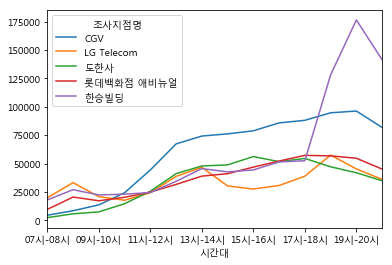

In [86]:
상위5개지점유동인구통계.plot()

## 5. 공공 API 활용 및 json 데이터 읽기 
### 서울시 데이터 포털에서 공공 API 활용하기

In [87]:
import requests #API를 호출하기 위한 라이브러리 import

In [ ]:
# 서울시 동별 인구통계
# http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

In [108]:
url = 'http://openapi.seoul.go.kr:8088'
api_key = 'sample' #개인인증키 발급받은 후, 입력
return_format = 'json'
service_id = 'octastatapi10043'
start_idx = 1
end_idx = 5

request_url = '/'.join([url, api_key, return_format, service_id, str(start_idx), str(end_idx)])
# 'http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/500/' 
response = requests.get(request_url)

In [109]:
response

<Response [200]>

In [110]:
response.status_code

200

In [111]:
response.text

'{"octastatapi10043":{"list_total_count":450,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"GIGAN":"2016","JACHIGU":"합계","DONG":"합계","SEDAE":"4189839","GYE_1":"10204057","NAMJA_1":"5007379","YEOJA_1":"5196678","GYE_2":"9930616","NAMJA_2":"4876789","YEOJA_2":"5053827","GYE_3":"273441","NAMJA_3":"130590","YEOJA_3":"142851","SEDAEDANGINGU":"2.37","N_65SEISANGGORYEONGJA":"1300877"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"소계","SEDAE":"72118","GYE_1":"161922","NAMJA_1":"79322","YEOJA_1":"82600","GYE_2":"152737","NAMJA_2":"75201","YEOJA_2":"77536","GYE_3":"9185","NAMJA_3":"4121","YEOJA_3":"5064","SEDAEDANGINGU":"2.12","N_65SEISANGGORYEONGJA":"25091"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"사직동","SEDAE":"4399","GYE_1":"10013","NAMJA_1":"4605","YEOJA_1":"5408","GYE_2":"9695","NAMJA_2":"4429","YEOJA_2":"5266","GYE_3":"318","NAMJA_3":"176","YEOJA_3":"142","SEDAEDANGINGU":"2.20","N_65SEISANGGORYEONGJA":"1707"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"삼청동","SEDAE":"1403","GYE_1":"3118"

In [112]:
jsondata = response.json()

In [113]:
jsondata = jsondata['octastatapi10043']['row']

In [114]:
동별인구통계 = DataFrame(jsondata)
동별인구통계

,DONG,GIGAN,GYE_1,GYE_2,GYE_3,JACHIGU,NAMJA_1,NAMJA_2,NAMJA_3,N_65SEISANGGORYEONGJA,SEDAE,SEDAEDANGINGU,YEOJA_1,YEOJA_2,YEOJA_3
0,합계,2016,10204057,9930616,273441,합계,5007379,4876789,130590,1300877,4189839,2.37,5196678,5053827,142851
1,소계,2016,161922,152737,9185,종로구,79322,75201,4121,25091,72118,2.12,82600,77536,5064
2,사직동,2016,10013,9695,318,종로구,4605,4429,176,1707,4399,2.20,5408,5266,142
3,삼청동,2016,3118,2903,215,종로구,1491,1377,114,624,1403,2.07,1627,1526,101
4,부암동,2016,11044,10616,428,종로구,5349,5160,189,1723,4371,2.43,5695,5456,239
